## 5.1 Minimos quadrados: caso discreto

O método dos mínimos quadrados é útil quando queremos aproximar uma função $f(x)$ por uma outra função $g(x)$, seja porque $f$ não tem expressão analítica conhecida, ou por ser de difícil tratamento ou manipulação. A função $g(x)$ pode ser uma combinação de funções polinomiais, exponenciais, logarítmicas, trigonométricas, etc.

De forma geral, escrevemos a função $g(x)$ como uma combinação linear das funções $g_1(x)$, $g_2(x)$,...,$g_n(x)$, ou seja:

$$ g(x) = a_1g_1(x)+a_2g_1(x)+...+a_ng_n(x)$$

O problema a ser resolvido, portanto, se resume em encontrar os parâmetros $a_1$, $a_2$, ..., $a_n$ para função $g(x)$ que melhor aproxima a função $f(x)$.

No **caso discreto** $f(x)$ é utilizado apenas num conjunto finito de pontos e no **caso contínuo** é usada a expressão analítica da função $f(x)$. 





Para encontrar a função $g(x)$ que melhor "se ajusta" aos $n$ pontos conhecidos de uma função $f(x)$ devemos buscar minimizar os desvios, ou erros,  $e(x_i) = f(x_i)-g(x_i)$, $i=1,...,m$. No método dos mínimos quadrados, se a função for conhecida apenas em um conjunto finito de pontos, fazemos isso minimizando a soma 

$$ E = \sum_{i=1}^{m} [e(x_i)]^2= \sum_{i=1}^{m} [f(x_i)-g(x_i)]^2 $$

Note que, diferentemente do que aproximar $f$ por interpolação, com mínimos quadrados, função $g(x)$ não necessariamente precisa passar pelos pontos mas sim se ajustar a eles. 

Se $f$ for conhecida, buscamos minimizar a função 

$$ E = \int_a^b [e(x)]^2 dx = \int_a^b [f(x)-g(x)]^2 dx$$

ou seja, buscamos minimizar a área entra os gráficos de $g(x)$ e $f(x)$.

O caso discreto é útil quando queremos aproximar uma função complicada por outra mais simples, ou então, obter uma função que possa representar um conjunto de dados obtidos experimentalmente. Por exemplo, se quisermos encontrar a função linear que representa o comportamento de uma mola a partir de medidas da força  $F$  aplicada para esticar essa mola e o do comprimento $x$ da mola esticada, podemos buscar a função linear $F(x)=kx$ (Lei de Hooke), encontrando constante elástica $k$ que determina a reta que melhor se ajusta aos dados.

### Caso discreto

Inicialmente vamos supor que queremos ajustar uma reta $g(x) = a_1x+a_2$ aos pontos $(x_i, f(x_i))$, $i=1,...,m$, como é mostrado na figura abaixo

<img src="https://github.com/tiagoburiol/metodos_numericos_em_python/blob/main/5_MINIMOS_QUADRADOS/imagens/ajuste_reta.png?raw=true" width="500">

Figura 5.1.1 - Ajuste de uma reta por um conjunto de pontos.


Então, buscamos os coeficientes $a_1$ e $a_2$ que determinam a reta que melhor se ajusta aos pontos, ou seja, os coeficientes que minimizam a função

$$ E(a_1, a_2)= \sum_{i=1}^{m} [g(x_i)-f(x_i)]^2 $$

Do cálculo infinitesimal, sabemos que se a função $ E(a_1, a_2)$ possui um ponto de mínimo, então suas derivadas parciais nesse ponto devem ser nulas, ou seja 

$$ \frac{\partial E}{\partial a_1} = 0  \,\,\,\,\,  \frac{\partial E}{\partial a_2} = 0$$ 

Derivando $ E(a_1, a_2)$ em relação a $a_1$ e $a_2$ obtemos

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left[ \sum_{i=1}^{m}\left(g(x_i)-f(x_i) \right)^2 \right]=0$$


ou

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left[ \left(\sum_{i=1}^{m} a_1 x_i
 + \sum_{i=1}^{m} a_2 - \sum_{i=1}^{m} f(x_i) \right)^2 \right]=0$$
 
ou, ainda
 
$$ \frac{\partial E}{\partial a_1} =   2 \left[a_1\sum_{i=1}^{m} x_i^2 + a_2\sum_{i=1}^{m} x_i \right] - 2 \left[\sum_{i=1}^{m} f(x_i)x_i \right] =0$$ 

e 

$$ \frac{\partial E}{\partial a_2} =   2 \left[a_1\sum_{i=1}^{m} x_i + ma_2 - \sum_{i=1}^{m} f(x_i)\right] =0$$ 

As equações obtidas nos permitem encontrar $a_1$ e $a_2$ por meio da resolução do sistema linear 

$$ \begin{cases} 
	         \left(\sum_{i=1}^{m} x_i^2\right)a_ 1 + \left(\sum_{i=1}^{m} x_i\right)a_ 2 = \sum_{i=1}^{m} f(x_i)x_i  \\
             \left(\sum_{i=1}^{m} x_i\right)a_ 1 + ma_ 2 = \sum_{i=1}^{m} f(x_i)
   \end{cases} $$
   
ou 

$$\left[\begin{array}{cc}
	         \sum_{i=1}^{m} x_i^2 & \sum_{i=1}^{m} x_i \\ 
	         \sum_{i=1}^{m} x_i   & m 
	         \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 
	         \end{array} \right]
=
\left[\begin{array}{c} 
	         \sum_{i=1}^{m} f(x_i)x_i \\ 
	         \sum_{i=1}^{m} f(x_i) 
	         \end{array} \right] 
             $$

**Exemplo 1:** ([Arenales, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/193)) Ajuste uma reta à função $f(x)$, tabelada como segue

$$\begin{array}{cccccc}
\hline
x_i   &0    &1     &2     &3      &4\\ \hline
f(x_i) &0.98 &-3.01 &-6.99 &-11.01 &-15 \\ \hline
\end{array} $$
             
             
             
*Resolução:*
Fazendo

$\sum_{i=1}^{5} x_i^2 = 0^2+1^2+2^2+3^2+4^2 = 30$

$\sum_{i=1}^{5} x_i = 0+1+2+3+4 = 10$

$\sum_{i=1}^{5} f(x_i)x_i = 0\times0.98+1\times(-3.01)+2\times(-6.99) +3\times(-11.01)+4\times(-15) = -3.996$

$\sum_{i=1}^{5} x_i = 0.98+(-3.01)+(-6.99) +3\times(-11.01)+(-15) = -3.996$

Então, fazendo 

$$\left[\begin{array}{cc}
	         \sum_{i=1}^{5} x_i^2 & \sum_{i=1}^{5} x_i \\ 
	         \sum_{i=1}^{5} x_i   & 5 
	         \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 
	         \end{array} \right]
=\left[\begin{array}{c} 
	         \sum_{i=1}^{5} f(x_i)x_i \\ 
	         \sum_{i=1}^{5} f(x_i) 
	         \end{array} \right]$$

Obtem-se


$$\left[\begin{array}{cc}
	         30 & 10 \\ 
	         10   & 5 
	         \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 
	         \end{array} \right]=
\left[\begin{array}{c} 
	         -110.02 \\ 
	         -35.03 
	         \end{array} \right] 
             $$

cuja solução fornece

$$
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 
	         \end{array} \right]=
\left[\begin{array}{c} 
	         -3.996 \\ 
	          0.986 
	         \end{array} \right]$$
             
Que são os coefinientes da reta procurada. 

Vamos agora fazer as contas usando Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Pontos tabelados
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0.98, -3.01, -6.99, -11.01, -15.0])

# Calcula os elementos das marizes
a11 = np.sum(X**2)
a12 = np.sum(X)
a22 = len(X)
b1 = np.sum(X * Y)
b2 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])
print ("A =", A)
B = np.array([b1,b2])
print ("b = ",B)

a = np.linalg.solve(A, B)
print ("Solução:", a)

A = [[30 10]
 [10  5]]
b =  [-110.02  -35.03]
Solução: [-3.996  0.986]


Assim, a reta procurada é $g(x) = -3.996x+0.986$

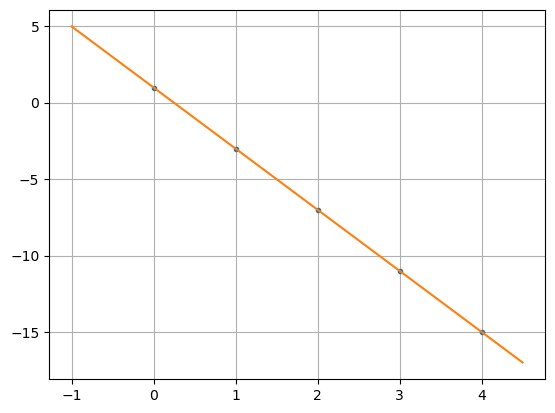

In [3]:
# Plotnado
# define a funcao g(x) para plotar 
g = lambda x: a[0]*x+a[1]

# cria pontos (x, y) da reta 
Xr = np.arange(-1, 5, 0.5)

# Plota os pontos e a reta
plt.plot(X, Y, ".", Xr, g(Xr), "-") 
plt.grid()
plt.show()




Para aproximar a função f(x) por um **polinômio de grau 2**, usamos a seguinte forma geral para $g(x)$

$$ g(x)=a_1g_1(x) + a_2g_2(x) + a_3g_3(x) = a_1x^2 + a_2x + a_3$$

com $g_1(x) = x^2$, $g_2(x) = x$ e $g_3(x) = 1$.


$$ E(a_1, a_2, a_3)= \sum_{i=1}^{m} [g(x_i)-f(x_i)]^2 $$

Procuramos o ponto de mínimo, em que as derivadas parciais são nulas, ou seja

$$ \frac{\partial E}{\partial a_1} = 0\,\,\, ,  \,\,\,  \frac{\partial E}{\partial a_2} = 0 \,\,\, e \,\,\,  \frac{\partial E}{\partial a_3} = 0$$ 

Derivando $ E(a_1, a_2, a_3)$ em relação a $a_1$, $a_2$ e $a_3$ obtemos

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left[ \sum_{i=1}^{m}\left(g(x_i)-f(x_i) \right)^2 \right]=0$$


ou

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left\{\left[ \left(\sum_{i=1}^{m} a_1 x_i^2
 +  a_2x_i + a_3\right) - \left(\sum_{i=1}^{m} f(x_i) \right)\right]^2 \right\}=0$$
 
ou, ainda
 
$$ \frac{\partial E}{\partial a_1} =   2 \left[a_1\sum_{i=1}^{m} x_i^4 + a_2\sum_{i=1}^{m} x_i^3 + a_3\sum_{i=1}^{m} x_i^2   \right] - 2 \left[\sum_{i=1}^{m} f(x_i)x_i^2 \right] =0$$ 

analogamente, derivando em relação a $a_2$ 

$$ \frac{\partial E}{\partial a_2} =   2 \left[a_1\sum_{i=1}^{m} x_i^3 +  a_2\sum_{i=1}^{m} x_i^2 + a_3\sum_{i=1}^{m} x_i \right] - 2\left[\sum_{i=1}^{m} f(x_i) x_i \right] =0$$ 

e em relação a $a_3$

$$ \frac{\partial E}{\partial a_3} =   2 \left[a_1\sum_{i=1}^{m} x_i^2 +  a_2\sum_{i=1}^{m} x_i + ma_3 \right] - 2\left[\sum_{i=1}^{m} f(x_i)\right] =0$$ 


Assim, as equações obtidas nos permitem montar um sistema linear cuja solução dará os coeficientes $a_1$, $a_2$ e $a_3$ procurados

$$ \begin{cases} 
              \left(\sum_{i=1}^{m} x_i^4\right)a_1 + \left(\sum_{i=1}^{m} x_i^3\right)a_2 +\left(\sum_{i=1}^{m} x_i^2\right)a_3  = \sum_{i=1}^{m} f(x_i)x_i^2  \\ 
              \\
	         \left(\sum_{i=1}^{m} x_i^3\right)a_1 + \left(\sum_{i=1}^{m} x_i^2\right)a_2 + \left(\sum_{i=1}^{m} x_i\right)a_3 = \sum_{i=1}^{m} f(x_i)x_i  \\
             \\
             \left(\sum_{i=1}^{m} x_i^2\right)a_ 1 + \left(\sum_{i=1}^{m} x_i\right)a_ 2 + \left(\sum_{i=1}^{m} 1\right)a_ 3  = \sum_{i=1}^{m} f(x_i)
   \end{cases} $$











**Exemplo 2:** ([Arenales, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/196)) Considere uma função f (x) definida conforme tabela

$$
\begin{array}{c|c|c|c|c|c|c}
x_i & -2 & -1 & 0 & 1 & 2 & 3 \\
\hline f\left(x_i\right) & 19.01 & 3.99 & -1.00 & 4.01 & 18.99 & 45.00
\end{array}
$$

Observando o gráfico, vemos que a função possui o comportamento de uma parábola, ou seja, podemos ajustar um polinômio de grau 2.

In [4]:
X = np.array([-2., -1., 0, 1., 2., 3.])
Y = np.array([19.01, 3.99, -1.00, 4.01, 18.99, 45.00])

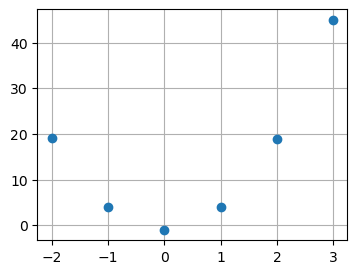

In [5]:
plt.figure(figsize=(4,3))
plt.plot(X, Y, "o")
plt.grid()
plt.show()

Assim, tomamos $g(x)=a_1 x^2+a_2 x+a_3$, isto é, $g_1(x)=x^2, g_2(x)=x, g_3(x)=1$, e determinamos os parâmetros $a_1, a_2$ e $a_3$ de modo que $g(x)$ se ajuste aos dados. Substituindo no sistema de equações normais temos:

$$
\left[\begin{array}{ccc}
\sum_{i=1}^6 x_i^4 & \sum_{i=1}^6 x_i^3 & \sum_{i=1}^6 x_i^2 \\
\sum_{i=1}^6 x_i^3 & \sum_{i=1}^6 x_i^2 & \sum_{i=1}^6 x_i \\
\sum_{i=1}^6 x_i^2 & \sum_{i=1}^6 x_i & 6
\end{array}\right]\left[\begin{array}{l}
a_1 \\
a_2 \\
a_3
\end{array}\right]=\left[\begin{array}{c}
\sum_{i=1}^6 f\left(x_i\right) x_i^2 \\
\sum_{i=1}^6 f\left(x_i\right) x_i \\
\sum_{i=1}^6 f\left(x_i\right)
\end{array}\right]
$$

ou

$$
\left[\begin{array}{ccc}
115 & 27 & 19 \\
27 & 19 & 3 \\
19 & 3 & 6
\end{array}\right]\left[\begin{array}{l}
a_1 \\
a_2 \\
a_3
\end{array}\right]=\left[\begin{array}{c}
565.00 \\
134.98 \\
90.00
\end{array}\right]
$$

Vamos fazer essas contas em Python:

In [6]:
# Monta o sistema
A = np.array([[np.sum(X**4), np.sum(X**3), np.sum(X**2)],
              [np.sum(X**3), np.sum(X**2), np.sum(X)   ], 
              [np.sum(X**2), np.sum(X),    len(X)]     ])

B = np.array([np.sum(X**2*Y),
              np.sum(X*Y)   ,
              np.sum(Y)     ])

print(A)
print(B)

[[115.  27.  19.]
 [ 27.  19.   3.]
 [ 19.   3.   6.]]
[565.   134.98  90.  ]


A solução do sistema nos fornece $ a_1=5,0898$, $a_2=0,0519$ e $a_3=-1,1437$ como podemos ver a seguir. Ou seja, a função que procuramos é $g(x) = 5,0898x^2 + 5,0898x -1,1437 $. Vamos plotar essa função junto com os pontos:

In [7]:
a = np.linalg.solve(A, B)
print (a)

[ 5.08982143  0.05189286 -1.14371429]


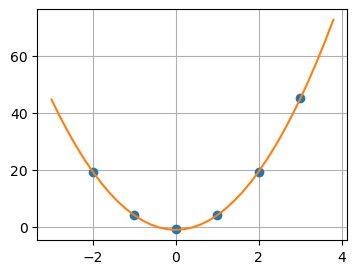

In [8]:
# define a funcao g(x) para plotar 
g = lambda x: a[0]*x*x+a[1]*x+a[2]

# gera os pontos
Xr = np.arange(X[0]-1, X[-1]+1, 0.2)
Yr = []
for x in Xr:
    Yr.append(g(x))    

# plota
plt.figure(figsize=(4,3))
plt.plot(X, Y, "o", Xr, Yr, "-") 
plt.grid()
plt.show()

#### Forma matricial do sistema
Observe que podemos obter o mesmo resultado se fizermos $A= V^TV$ e  $B=V^T y_i$, onde $V$ é a matriz cujas linhas são formadas por $[g_1(x_i) \,\, g_n(x_i) \,\,... \,\,g_n(x_i)\,\,]$, $i=1,...,m$. Nesse caso, a solução pode ser obtida fazendo:

$$ a = (V^TV)^{-1}V^Ty $$

Observe os códigos a seguir:

In [9]:
V = np.array([X**2, X**1, X**0]).T
print (V)

[[ 4. -2.  1.]
 [ 1. -1.  1.]
 [ 0.  0.  1.]
 [ 1.  1.  1.]
 [ 4.  2.  1.]
 [ 9.  3.  1.]]


In [10]:
A = np.dot(V.T,V)
print (A)

[[115.  27.  19.]
 [ 27.  19.   3.]
 [ 19.   3.   6.]]


In [11]:
B = np.dot(V.T,Y)
print('B=',B)

B= [565.   134.98  90.  ]


In [12]:
a = np.linalg.solve(A,B)
print('solução:', a)

solução: [ 5.08982143  0.05189286 -1.14371429]


Ou ainda, de forma mais compacta,fazendo $ a = (V^TV)^{-1}V^Ty $:

In [13]:
# importando as funções para multiplicar e inverter
from numpy.linalg import inv
from numpy import dot

In [14]:
# resolvendo o sistema
a = inv(dot(V.T,V)).dot(dot(V.T,Y))
print('solução:', a)

solução: [ 5.08982143  0.05189286 -1.14371429]


**Generalizando o procedimento**, podemos determinar os coeficientes $a_1,a_2,...,a_n$ da função$ g(x) = a_1g_1(x)+a_1g_1(x)+...+a_ng_n(x)$ resolvendo o sistema linear formado pelas equações 

$$ \frac{\partial E}{\partial a_1} = 0, \,\,  \frac{\partial E}{\partial a_2} = 0, ..., \,\, \frac{\partial E}{\partial a_n} = 0$$ 

ou seja, 

$$ \begin{cases} 
\left(\sum_{i=1}^{m} g_1(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_1(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_1(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_1(x_i) \\
\left(\sum_{i=1}^{m} g_2(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_2(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_2(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_2(x_i) \\
\vdots\\
\left(\sum_{i=1}^{m} g_n(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_n(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_n(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_n(x_i) \\
\end{cases} $$

**Exemplo 3:** Dado o seguinte conjunto de dados
$$
  \begin{array}{l|ccccccccccc}
  \hline
x_i & 0,0 & 0,1 & 0,2 & 0,3 & 0,4 & 0,5 & 0,6 & 0,7 & 0,8 & 0,9 & 1,0\\\hline
      y_i & 31 & 35 & 37 & 33 & 28 & 20 & 16 & 15 & 18 & 23 & 31\\
    \hline
  \end{array}
$$

Encontre a função do tipo $f(x)=a+b\sin(2\pi x)+c\cos(2\pi x)$ que melhor aproxima os valores dados.

In [15]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [16]:
x = np.linspace(0.0,1.0, 11)
y = np.array([31.,35.,37,33.,28.,20.,16.,15.,18.,23.,31.])

In [17]:
g1 = lambda x: np.ones(len(x))
g2 = lambda x: np.sin(2*np.pi*x)
g3 = lambda x: np.cos(2*np.pi*x)

In [18]:
V = np.array([g1(x), g2(x), g3(x)])

In [19]:
A = V.dot(V.T)
B = np.dot(V,y)
a = np.linalg.solve(A,B)

In [20]:
g = lambda x: a[0]*g1(x)+a[1]*g2(x)+a[2]*g3(x)

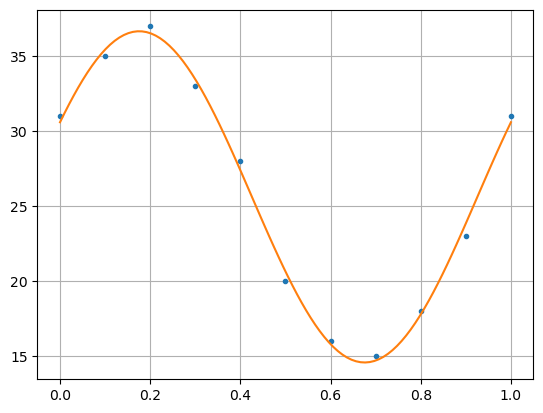

In [21]:
# Plota os pontos e a função g(x)
xp = np.linspace(0.0,1.0,100)
plt.plot(x, y, ".")
plt.plot(xp, g(xp), "-") 
plt.grid()
plt.show()

#### Ajuste linear não polinomial

Uma função do tipo 

$$ g(x) = a_1 g_1(x) + a_2 g_2(x) + ... + a_n g_n(x)$$

é dita um _modelo de regressão linear_. O adjetivo "linear" é usado para indicar que o modelo é linear nos parâmetros $a_1$, $a_2$,..., $a_n$ e não porque é um função linear de $x$. Por exemplo, uma expressão da forma

$$ y = a_1 + a_2 log(x) + a_3 x^3 $$ 

é um modelo de regressão linear múltipla, assim como os ajustes polinomiais feitos nos capítulos anteriores, mas o mesmo não acontece com a equação 

$$y =a_1 + a_2 x^{a_3} + a_4 x^2$$

Algumas maneiras de justar funções não lineares serão discutidos nas próximas seções. Por hora, apresentamos um exemplo de ajuste linear não polinomial.

**Exemplo 4:** Considere o segunte conjunto de pontos

$$\begin{array}{cccccccccccc}
x_i    &-0.5 &0.0 &0.5 &1.0 &1.5 &2.0 &2.5 &3.0 &3.5 &4.0 &4.5\\ 
f(x_i) &-0.25 &0.5 &0.25 &0.0 &0.75 &1.5 &1.25 &1.00 &1.75 &2.5 &2.25
\end{array} $$

Usando o método dos mínimos quadrados, ajuste uma função $g(x)$ aos dados.

**Solução:**
Primeiramente, construimos o diagrama de dispersão dos pontos dados: 

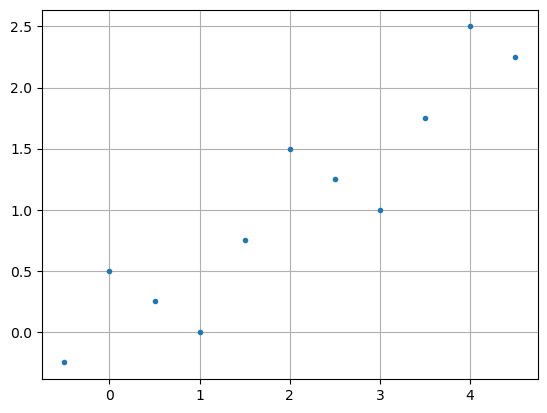

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
Y = np.array([-0.25, 0.5, 0.25, 0.0, 0.75, 1.5, 1.25, 1.00, 1.75, 2.5, 2.25])

# Plota os pontos e a reta
plt.plot(X, Y, ".") 
plt.grid()
plt.show()

É possível perceber que os pontos parecem crescer linearmente mas também parecem oscilar com período igual a 2. 

Essas características sugerem uma função do tipo $g(x) = a_1x+a_2 \cos(\pi x)$ em que $g_1(x)=x$ e $g_2(x) = cos(\pi x)$.

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
71.5 2.0000000000000018 5.0
36.75 3.5000000000000004
[0.5 0.5]


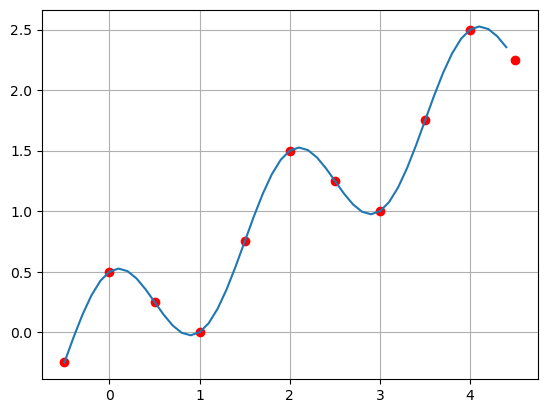

In [23]:
from scipy.linalg import solve

# Calcula os elementos das marizes
g1 = lambda X: X
g2 = lambda X: np.cos(np.pi*X)

print (g1(X))
a11 = np.sum(np.multiply(g1(X),g1(X)))
a12 = np.sum(np.multiply(g1(X),g2(X)))
a21 = a12
a22 = np.sum(np.multiply(g2(X),g2(X)))

print (a11, a12, a22)

b1 = np.sum(np.multiply(Y,g1(X)))
b2 = np.sum(np.multiply(Y,g2(X)))

print (b1,b2)


# Monta e resolve o sistema
A = np.array([[a11, a12],
              [a21, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda X: a[0]*g1(X)+a[1]*g2(X)

# cria pontos (x, y) da reta 
Xr = np.arange(X[0], X[-1], 0.1)
Yr = g(Xr)   

# Plota os pontos e a reta
plt.plot(X, Y, "ro", Xr, Yr, "-") 
plt.grid()
plt.show()


### Exercícios:

**1.** Em um experimento foram obtidos os seguintes dados:

$$
\begin{array}{c|c|c|c|c|c}
x_i & 0 & 1 & 2 & 3 & 4 \\
\hline f\left(x_i\right) & 0.01 & 1.01 & 1.40 & 3.81 & 4.01
\end{array}
$$

a) Determine a reta que melhor se ajusta aos dados da tabela, usando o método dos mínimos quadrados

b) Calcule a soma do erro quadrático $\sum_{i=1}^5 (f(x_i)-g(x_i))^2$

**2.**  Encontre o polinômio $p(x) = a_1 + a_2x + a_3x^2$ que melhor se ajusta no sentido de mínimos quadrados aos pontos:

$$
    \begin{array}{l|cccc}
    \hline
      i & 1 & 2 & 3 & 4 \\\hline
      x_i & -1,50 & -0,50 & 1,25 & 1,50\\
      y_i & 1,15 & -0,37 & 0,17 & 0,94\\
    \hline
  \end{array}
$$

_Resposta:_ $a_1 = -0,67112$, $a_2 = -0,12123$, $a_3 = 0,73907$.

**3.** Encontrar a parábola $y=ax^2+bx+c$ que melhor aproxima o seguinte conjunto de dados:
$$
  \begin{array}{l|ccccc}
  \hline
      i & 1 & 2 & 3 & 4 & 5 \\\hline
      x_i & 0,01 & 1,02 & 2,04 & 2,95 & 3,55\\
      y_i & 1,99 & 4,55 & 7,20 & 9,51 & 10,82\\
    \hline
  \end{array}
$$
_Resposta:_     $y=-0,0407898x^2+ 2,6613293x+ 1,9364598$

**4.** Após serem efetuadas medições num gerador de corrente contínua, foram obtidos os seguintes
valores indicados por um voltímetro e um amperímetro.
$$
\begin{array}{ccccccccccccc}
    \hline
I(A) &1.58&1.75&2.10&2.20&2.50&3.50&3.75&4.25&4.8&4.9&3.12    \\ \hline
V(v) &210&155&170&120&85&50&110&79&150&120&60		  \\
\hline
\end{array}
$$
Faça um gráfico dos dados.(a) Ajuste os dados por polinômio de grau adequado. (b) Estime o valor a ser obtido no voltímetro quando o amperímetro estiver marcando $4.0A$.

**5.** Dados os seguintes pontos tabelados 
$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

Encontre o polinômio de grau 3 que melhor se ajusta aos pontos dados.

**6.** Dados os seguintes pontos tabelados 
$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

Encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta.


**7.** Dado o seguinte conjunto de dados
$$
  \begin{array}{l|ccccccccccc}
  \hline
x_i & 0,0 & 0,1 & 0,2 & 0,3 & 0,4 & 0,5 & 0,6 & 0,7 & 0,8 & 0,9 & 1,0\\\hline
      y_i & 31 & 35 & 37 & 33 & 28 & 20 & 16 & 15 & 18 & 23 & 31\\
    \hline
  \end{array}
$$

a) Encontre a função do tipo $f(x)=a+b\sin(2\pi x)+c\cos(2\pi x)$ que melhor aproxima os valores dados.

b) Encontre a função do tipo $f(x)=a+bx+cx^2+dx^3$ que melhor aproxima os valores dados.


_Resposta:_    a) $a=25,638625$, $b=9,8591874$, $c=4,9751219$; b)$a=31,475524$, $b=65,691531$, $c=-272,84382$, $d=208,23621$.

Fonte: https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/adc-ajuste_linear_geral.html